# TD1 exo 1 sur le TFSD (Corrigé Python)

Exécution interactive en ligne ici [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/balaise31/Signal/master?labpath=discret%2Ftd%2FFREQ_code%2Fexo1_tfsd_corr.ipynb)

|        | Sujet | Corrigé |
|--------|-------|---------|
|Python  | [sujet python](./exo1_tfsd.ipynb) | [corrigé python](./exo1_tfsd_corr.ipynb) |
|Octave  | [sujet octave](./exo1_tfsd_octave.ipynb) | [corrigé octave](./exo1_tfsd_corr_octave.ipynb) |



Retour au [sujet de TD papier](../FREQ_sujet.ipynb)


L'axe des temps est discret donc facilement représentable avec $t=k\,Te$, il suffit de créer un vecteur du temps discret $k$ de -5 à 5 par exemple et de calculer le vecteur temps $t$ qui y correspond (utile pour l'affichage)



In [1]:
import numpy as np  # tout pour le numerique, matriciel etc.
Fe=0.1
Te = 1/Fe

## VOTRE CODE calculant k de -5 à 5: utilisez np.arange(dep,step,fin) pas de boucle
# Attention np.arange(a,b) donne le segment SEMI-OUVERT [a, b[
# pour obtenir de l'aide sur une fonction ajoutez ? à la fin...
#np.arange?
k=np.arange(-5,11)

##VOTRE CODE calculant t : le produit entre scalaire et vecteur existe en math
#  donc aussi en python
t=k*Te

## SHIFT + ENTER pour exécuter la cellule de code.
# pour afficher on fait avec print, display
print(t)
print(f"k = {k} échantillons de {Te} secondes")

[-50. -40. -30. -20. -10.   0.  10.  20.  30.  40.  50.  60.  70.  80.
  90. 100.]
k = [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] échantillons de 10.0 secondes


Dans la TFSD les fréquences sont continues entre 0 et $F_e$ et impossible à stocker dans un ordinateur.
On s'en rapproche avec une résolution très fine  $\Delta_f=0.001$ 𝐻𝑧 (par exemple) comparée à la fréquence d'échantillonnage  𝐹𝑒=1  arbitraire. 

On peut choisir d'échantillonner en fréquence avec 1000 points entre 0 et $F_e$ et en déduire la résolution $\Delta_f=\frac{F_e}{1000}$. On peut calculer **inutilement** la TFSD pour des fréquences au-delà de $F_e$ pour vérifier la périodicité du spêctre. 

In [2]:
Df= Fe/1000 #résolution fine

## VOTRE CODE: f=
# déclarant le vecteur f de -2.Fe à 2.Fe par pas de Df
f=np.arange(-2*Fe,2*Fe,Df)

## VOTRE CODE: N = 
# utilisez la fonction 'len' pour calculer  le nombre N
# de points du vecteur f 
N = len(f)

# une commande magique de jupyter (ce n'est pas du python) permet de voir les variables
%whos

Variable   Type       Data/Info
-------------------------------
Df         float      0.0001
Fe         float      0.1
N          int        4000
Te         float      10.0
f          ndarray    4000: 4000 elems, type `float64`, 32000 bytes
k          ndarray    16: 16 elems, type `int64`, 128 bytes
np         module     <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
t          ndarray    16: 16 elems, type `float64`, 128 bytes


On définit la fonction impulsion unité $\delta_0[k] = 1$ uniquement si $k=0$, elle joue le même rôle que l'impulsion de Dirac. 

Pour cela on aurait pu faire une fonction :
``` python
def delta(k):
    if k == 0: 
        val= 1.
    else :
        val = 0.
        
    return val
```     
Attention, ici k ne peut être qu'un scalaire. Si l'on veut 
La fonction deviendrait 
``` python
def delta(k):
     return np.array(k==0, dtype=float)
```     
Ainsi la liste de booléen `k==0` est transformé en tableau numpy `np.array` dont les éléments sont convertis en float grâce à `dtype=float`

Si la fonction tient en une ligne alors on profite des fonctions anonymes. Par exemple f = x^2 -3 deviendrait
``` python
 f = lambda  x : x^2 -3
```     
Cette fonction est vectorisée et donc ```f(1:10)``` retourne bien un vecteur de la fonction évaluée en 10 points.

Déclarez delta et affichez-la :

In [3]:
## VOTRE CODE : delta = 
# déclarant la fonction  k |---> delta[k]
delta = lambda k: np.array(k==0, dtype=float) 

## VOTRE CODE : x0 = 
# stockez dans un vecteur x0 la valeur de delta 
#  calculée pour toute les valeur du vecteur k (pas de boucle !)
x0 = delta(k);

l=2;
## VOTRE CODE :  xl = 
#                 |__c'est un l minuscule pas un 1 ! 
# le vecteur des valeurs de delta[k-l]
xl = delta(k-l); # retardé de l=2 échantillons


# On affiche vos signaux 
print(f" k = \t {k}")
print(f"x0 = \t {x0}") 
print(np.block([[k],  #première ligne contient k
                [x0]  #deuxième x0
               ] 
              )) 

 k = 	 [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10]
x0 = 	 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


On va utiliser les fonctions d'affichage `stem` et `plot` pour représenter ces signaux.
Pour accéder à de l'aide et tester des commandes : utilisez la console.

> **Ouvrez une console** :
>  File→New→Console (onglet) ou File→New console for notebook (console en bas)  
> Choisissez le kernel (octave ici)

Exécutez la ligne `from matplotlib.pyplot import stem` de la cellule ci-dessoys pour importer la librairie.
Puis **dans la console** obtenez de l'aide en faisant `stem?`

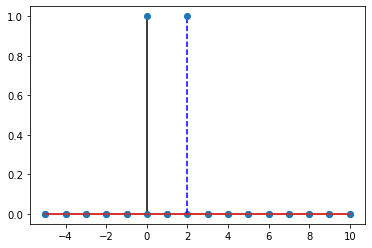

In [4]:
from matplotlib.pyplot import stem, show
## OUVREZ une console et exécutez `stem?` APRES avoir exécutez la ligne ci-dessus
# vous pouvez mettre au point vos ligne de commande dans la console 
# avant de mettre la bonne version ici.

## VOTRE CODE : stem(...)
# affichant les deux signaux
stem(k, x0, linefmt='k');
stem(k, xl, linefmt='sb--'); #"Squares Blue en --"
# changez le style d'affichage 'lineformat="r--"' rouge avec tirets 'sk' des 'Squares' en blacK..

show()

Par défaut Jupyter fait un affichage avec une image fixe en ligne des figures venant de matplotlib lorsque la commande `show()` est exécutée. 

Le comportement peut être modifié par des *commandes magiques* comme
```
%matplotlib tk        #affiche fenêtre interractive (exécution locale)  
%matplotlib inline    #affiche une image fixe dans le notebook
```

Exécutez la commande `%matplotlib tk` la console et relancez la cellule précédente pour voir l'effet

Il suffit ensuite de faire un script TFSD qui fait le calcul pour chaque fréquence contenue dans le vecteur f (supposé être continu de 0 à Fe) avec tous les instants contenu dans k (qui est bien un vecteur d'entiers, mais supposé être infini...)

C'est déjà fait ! 
Faites `help tfsd` dans la console et jetez un œil au script [tfsd](tfsd.m) qui ressemble beaucoup aux scripts de deuxieme année.

Pour les affichages à gauche temporel, à droite fréquentiel, en haut partie réelle et en bas partie imaginaire, je vous ai fait la fonction [plot_dual](plot_dual.m).

À vous de mettre les bonnes légendes avec les bonnes sunités.

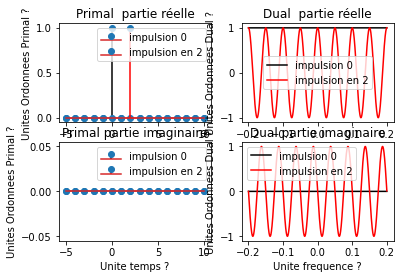

In [5]:
from tfsd import tfsd, plot_dual

## VOTRE CODE tfsd_x0 =
# appelle la fonction tfsd avec le signal x0 
# pour obtenir de spoints de la tfsd de x0 pour toutes valeur de f
tfsd_x0 = tfsd(x0,k,f,Te);

## VOTRE CODE tfsd_xl= 
tfsd_xl = tfsd(xl,k,f,Te);

# gros affichage à faire DéCOMMENTEZ cette ligne 
# %matplotlib tk   # pour une affichage interactif

## COMPLETEZ les ? : l'appel de plot dual pour indiquer les unités
plot_dual(xs=[[k,k],   [f,f]],
          ys=[[x0,xl], [tfsd_x0,tfsd_xl]],
          legendes=["impulsion 0","impulsion en 2"],
          labelx=["Unite temps ?","Unite frequence ?"],
          labely=["Unites Ordonnees Primal ?", "Unites Ordonnees Dual ?"],
          est_discret=[True, False]
         )
show()

On a donc bien tfsd$[\delta_0][n]= 1$ et tfsd$[\delta_2][n]= e^{-i\,2\pi\,f\;2T_e}$

On peut vérifier autrement qu'à l'œil, en calculant l'énergie de l'erreur entre le calcul et la formule :

In [6]:
from numpy import exp, pi   # évite les np.exp et np.pi 

# On calcule exp(-i.2.pi.f.l.Te) pour toutes valeur de f
tfsd_xl_theorique = exp(1j*2*pi*f*l*Te)

# on calcule le vecteur d'erreur entre calcul numérique 
# et formule théorique
erreur = tfsd_xl - tfsd_xl_theorique

# on calcule la norme au carré de l'erreur 
# ||erreur||^2 = <<erreur, erreur>>
norme_carre_erreur = erreur.T * erreur   # M.T donne "la transposée de M" 
norme_carre_erreur.shape


(4000,)

Et oui ! Les opérateurs avec python et numpy sont des **opérateurs élément par élément**, même pour des tableaux `np.ndarray`. Ici nous avons les 4000 éléments de erreur multipliés à eux-mêmes. On pourrait l'avoir avec `erreur**2` aussi.

On peut demander un **produit matriciel avec `@`** au lieu de `*` et s'assurer que même **les vecteurs lignes sont 2D avec `.reshape(-1,1)`** 

> `v=v.reshape(1,N)` fait passer v de 1D de taille (N,) à un vecteur 2D ligne de taille (1,N)  
> `v=v.reshape(N,1)` fait passer v de 1D de taille (N,) à un vecteur 2D colonne de taille (N,1)  
> si l'on ne veut pas s'embêter à trouver N on met -1 pour dire "débrouilles toi mais cela doit rentrer"  
> **`v = v.reshape(1,-1)` fait passer en 2D ligne**  
> **`v = v.reshape(-1,1)` fait passer en 2D colonne**  


In [7]:

print(f" dimension de \t erreur \t\t de type np.ndarray = \t{erreur.shape} 1D")
print(f" dimension de \t erreur.T *  erreur \t de type ndarray = \t{(erreur.T * erreur).shape} est un vecteur (produit 1D par éléments)")

err=erreur.reshape(1,-1) ## On passe en 2D ligne
#err @ err   # ce produit donne une erreur car (1,n) x (1,n)
print(f" dimension de \t err=erreur.reshape(-1,1) \t\t de type np.ndarray = \t{err.shape} 2D")
print(f" dimension de \t err.T @ err \t de type matrix = \t{(err.T @ err).shape} grosse matrice (produit 2D matriciel)\n")


 dimension de 	 erreur 		 de type np.ndarray = 	(4000,) 1D
 dimension de 	 erreur.T *  erreur 	 de type ndarray = 	(4000,) est un vecteur (produit 1D par éléments)
 dimension de 	 err=erreur.reshape(-1,1) 		 de type np.ndarray = 	(1, 4000) 2D
 dimension de 	 err.T @ err 	 de type matrix = 	(4000, 4000) grosse matrice (produit 2D matriciel)



Remarquez que la taille est :
  * (4000,) pour un `ndarray 1D` (tableau 1D) et 
  * (4000,1) pour une `ndarray 2D` (tableau 2D, mais colonne) obtenu avec `.reshape(-1,1)`
  
Utilisez des matrices 2D (et donc le vecteur err) et le produit matriciel `@` pour obtenir le produit scalaire <err, err> qui comme le dit son nom doit être de dimension scalaire = (1,1) 

In [8]:
## VOTRE CODE : norme_carre_erreur =
# corrigeant l'erreur de dimension des vecteurs
norme_carre_erreur = err @ err.T
print(f"{norme_carre_erreur} de taille {norme_carre_erreur.shape} scalaire")

[[-8000.+0.j]] de taille (1, 1) scalaire


La norme de l'erreur est réelle certe mais **n'est pas positive** !

Et oui, avec une fonction complexe on a un presque scalaire dit Hilbertien.

Pour avoir une norme positive on utilise la transposée de Hilbert ou conjugué de Hilbert :
$M^H = \overline{{}^T\!M} = {}^T\!\overline{M}$ 

Corrigez encore en utilant soit `.T` et `.conj()`, ou en définissant  ! 
On peut aussi déclarer une fonction lambda "scal(u, v)" de deux arguments vecteurs ligne avec
`scal = lambda u,v : ` ...

In [9]:
# VOTRE CODE: norme_carre_erreur =
# la norme doit être positive
H = lambda M: M.T.conj()
norme_carre_erreur = err @ H(err)
print(norme_carre_erreur)

scal = lambda u,v : u@H(v) 
print(scal(err,err))

[[8000.+0.j]]
[[8000.+0.j]]


La norme est positive, mais vaut 8000 et donc pas nulle !

> J'ai mis une erreur bêêêêêête dans l'un des deux signaux (la norme doit être bonne maintenant)  
> Affichez les deux signaux `tfsd_xl` et `tfsd_xl_theorique` pour voir qui est faux et quelle erreur bête  

Text(0.5, 1.0, 'partie imaginaire')

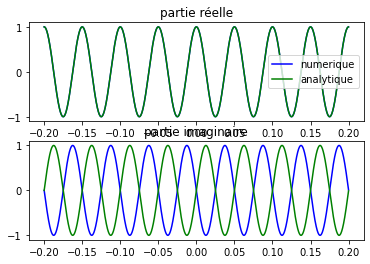

In [10]:
from matplotlib.pyplot import subplot, plot, title, legend
from numpy import real, imag

%matplotlib inline
## VOTRE CODE : affichant le signal 
subplot(211)
plot(f,real(tfsd_xl),'b',f,real(tfsd_xl_theorique),'g')
title("partie réelle")
legend(["numerique","analytique"])
subplot(212)
plot(f,imag(tfsd_xl),'b',f,imag(tfsd_xl_theorique),'g')
title("partie imaginaire")

On corrige : on voit que la partie imaginaire est opposée (impaire)....

>On a donc un résultat qui est le conjugué de l'autre  
>ça sent l'erreur de signe dans une exponentielle !

In [11]:
## VOTRE CODE : corrigeant l'erreur et recalculant

tfsd_xl_theorique = exp(-2j*pi*f*l*Te);
#                       |___ erreur de signe qui fait que l'on a le conjugué

erreur = (tfsd_xl - tfsd_xl_theorique).reshape(1,-1)

norme_carre_erreur = erreur @ H(erreur)# err * err   # ce produit donne une erreur car (1,n) x (1,n)
print(norme_carre_erreur)

[[0.+0.j]]


Ouf on est bon ! 

  - [exo1 tfsd sujet python](exo1_tfsd.ipynb)
